# AWS Sagemaker Groud Truth Labeling Results
In this notebook, we are analzing the results from AWS sagemaker ground truth. We used AWS to evaluate our generated outfits using human labelers. We tested 100 different user prompts and generated 5 outfits using each prompt, before asking AWS mechanical turk workers to label the recommended outfits as either good or bad.

The results were decent as we got a 60% overall approval rate on our generated outfits. User prompts requesting an outfit for a specific occasion such for a wedding performed the best at 71% approval, while the user prompts focused on the style such as a vintage look performed the worst at 52%. Although we are not quite at the approval rate we were hoping for, we now have a labelled dataset that we can utilize to fine-tune the model for better human preferences alignment in the future.

In [2]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt

In [3]:
eval_df = pd.read_csv("/content/drive/MyDrive/MIDS Capstone/evals_df.csv")
eval_df = eval_df.drop(columns="Unnamed: 0")
eval_df

,outfit,explanation,styling,prompt,image_paths
0,"[42, 36, 2, 18]","""This outfit combines classic style with moder...","""Complete the look with a crisp white dress sh...",Men's outfit for a formal wedding,['/content/drive/MyDrive/MIDS Capstone/eval se...
1,"[6, 41, 56, 81]","""This outfit combines classic formal wear with...","""Complete the look with a crisp white shirt co...",Men's outfit for a formal wedding,['/content/drive/MyDrive/MIDS Capstone/eval se...
2,"[40, 57, 42, 43, 7]","""The combination of a tailored blazer, a slim-...","""Complete the look with a crisp white pocket s...",Men's outfit for a formal wedding,['/content/drive/MyDrive/MIDS Capstone/eval se...
3,"[15, 11, 16, 30]","""This outfit combines classic formal wear with...","""Pair the outfit with a crisp white pocket squ...",Men's outfit for a formal wedding,['/content/drive/MyDrive/MIDS Capstone/eval se...
4,"[70, 71, 32, 30, 11]","""This outfit combines classic style with moder...","""Complete the look with a crisp white shirt an...",Men's outfit for a formal wedding,['/content/drive/MyDrive/MIDS Capstone/eval se...
...,...,...,...,...,...
495,"[15, 16, 2, 77]","""The outfit combines complementary green and p...","""Pair the outfit with a statement necklace or ...",Women's outfit featuring complementary green a...,['/content/drive/MyDrive/MIDS Capstone/eval se...
496,"[12, 34, 30]","""This outfit combines the complementary colors...","""Pair the dress with a statement necklace or a...",Women's outfit featuring complementary green a...,['/content/drive/MyDrive/MIDS Capstone/eval se...
497,"[1, 22, 0, 71]","""The outfit combines a marled gray hoodie (Ite...","""Pair the outfit with a sleek backpack and a s...",Men's practical outfit for a rainy day,['/content/drive/MyDrive/MIDS Capstone/eval se...
498,"[62, 45, 39, 23, 67, 37, 87]","""This outfit combines warmth, comfort, and pra...","""Pair the outfit with a stylish beanie and glo...",Women's outfit for protection during a heavy s...,['/content/drive/MyDrive/MIDS Capstone/eval se...


In [6]:
import os
import json
import pandas as pd

# Define the parent directory
parent_dir = "/content/drive/MyDrive/MIDS Capstone/annotations/worker-response/iteration-1/"

# Initialize lists to store the extracted values
labels = []
time_spent = []

# Loop through folders from 0 to 499
for i in range(500):
    folder_path = os.path.join(parent_dir, str(i))

    # Check if the folder exists before trying to access it
    if os.path.exists(folder_path):
        # Look for json files in the folder
        json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]

        if json_files:
            # Take the first json file if there are multiple
            json_file_path = os.path.join(folder_path, json_files[0])

            # Read and parse the json file
            with open(json_file_path, 'r') as f:
                data = json.load(f)

            try:
                # Extract the label
                label = data["answers"][0]["answerContent"]["category"]["label"]
                labels.append(label)

                # Extract the timeSpentInSeconds
                seconds = data["answers"][0]["timeSpentInSeconds"]
                time_spent.append(seconds)
            except (KeyError, IndexError):
                # If values can't be found, append None
                labels.append(None)
                time_spent.append(None)
        else:
            # If no json file is found, append None for both values
            labels.append(None)
            time_spent.append(None)
    else:
        # If the directory does not exist, print a message and append None values
        print(f"Directory not found: {folder_path}")
        labels.append(None)
        time_spent.append(None)

# Add the extracted values as new columns to the dataframe
eval_df['label'] = labels
eval_df['time_spent_seconds'] = time_spent

# Display the first few rows to verify
eval_df.head()

,outfit,explanation,styling,prompt,image_paths,label,time_spent_seconds
0,"[42, 36, 2, 18]","""This outfit combines classic style with moder...","""Complete the look with a crisp white dress sh...",Men's outfit for a formal wedding,['/content/drive/MyDrive/MIDS Capstone/eval se...,Good Outfit,7.0
1,"[6, 41, 56, 81]","""This outfit combines classic formal wear with...","""Complete the look with a crisp white shirt co...",Men's outfit for a formal wedding,['/content/drive/MyDrive/MIDS Capstone/eval se...,Bad Outfit,38.0
2,"[40, 57, 42, 43, 7]","""The combination of a tailored blazer, a slim-...","""Complete the look with a crisp white pocket s...",Men's outfit for a formal wedding,['/content/drive/MyDrive/MIDS Capstone/eval se...,Bad Outfit,22.0
3,"[15, 11, 16, 30]","""This outfit combines classic formal wear with...","""Pair the outfit with a crisp white pocket squ...",Men's outfit for a formal wedding,['/content/drive/MyDrive/MIDS Capstone/eval se...,Bad Outfit,34.0
4,"[70, 71, 32, 30, 11]","""This outfit combines classic style with moder...","""Complete the look with a crisp white shirt an...",Men's outfit for a formal wedding,['/content/drive/MyDrive/MIDS Capstone/eval se...,Bad Outfit,33.0


17.0
9.0


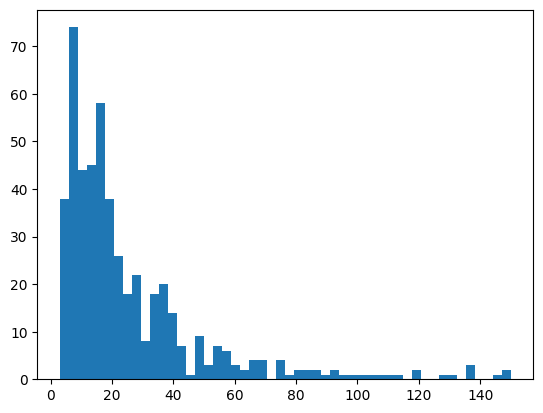

In [7]:
#plot distribution of time spent
plt.hist(eval_df["time_spent_seconds"], bins=50)
print(np.median(eval_df["time_spent_seconds"]))
print(np.percentile(eval_df["time_spent_seconds"], 25))

In [ ]:
eval_df["label"].value_counts().reset_index()

,label,count
0,Good Outfit,240
1,Bad Outfit,153
2,Unsure,9


<BarContainer object of 3 artists>

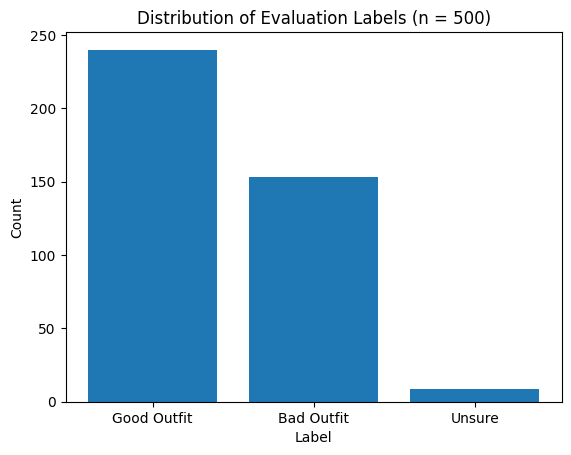

In [ ]:
# visualize histogram of labels titled Distribution of Evaluation Labels
plt.title("Distribution of Evaluation Labels (n = 500)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.bar(eval_df["label"].value_counts().reset_index()["label"], eval_df["label"].value_counts().reset_index()["count"])

In [ ]:
# List of gendered prompts organized by category
gendered_prompts = {
    "Occasion/Activity Prompts": [
        {"male": "Men's outfit for a formal wedding", "female": "Women's outfit for a formal wedding"},
        {"male": "Men's work attire for a corporate office environment", "female": "Women's work attire for a corporate office environment"},
        {"male": "Men's casual outfit for weekend brunch with friends", "female": "Women's casual outfit for weekend brunch with friends"},
        {"male": "Men's athletic wear for a morning jog in the park", "female": "Women's athletic wear for a morning jog in the park"},
        {"male": "Men's business casual outfit for a job interview", "female": "Women's business casual outfit for a job interview"},
        {"male": "Men's outfit for a first date at an upscale restaurant", "female": "Women's outfit for a first date at an upscale restaurant"},
        {"male": "Men's attire for a weekend music festival", "female": "Women's attire for a weekend music festival"},
        {"male": "Men's professional outfit for delivering a conference presentation", "female": "Women's professional outfit for delivering a conference presentation"},
        {"male": "Men's casual look for a quick grocery shopping trip", "female": "Women's casual look for a quick grocery shopping trip"},
        {"male": "Men's comfortable outfit for a family reunion picnic", "female": "Women's comfortable outfit for a family reunion picnic"},
        {"male": "Men's cocktail attire for an evening charity gala", "female": "Women's cocktail attire for an evening charity gala"},
        {"male": "Men's workout clothes for a yoga class", "female": "Women's workout clothes for a yoga class"},
        {"male": "Men's outfit for attending a graduation ceremony", "female": "Women's outfit for attending a graduation ceremony"},
        {"male": "Men's casual look for studying at a coffee shop", "female": "Women's casual look for studying at a coffee shop"},
        {"male": "Men's attire for a night out at a trendy nightclub", "female": "Women's attire for a night out at a trendy nightclub"},
        {"male": "Men's smart casual outfit for a dinner party at a friend's home", "female": "Women's smart casual outfit for a dinner party at a friend's home"},
        {"male": "Men's hiking outfit for a day on the trails", "female": "Women's hiking outfit for a day on the trails"},
        {"male": "Men's business formal attire for an important board meeting", "female": "Women's business formal attire for an important board meeting"},
        {"male": "Men's comfortable outfit for a movie night with friends", "female": "Women's comfortable outfit for a movie night with friends"},
        {"male": "Men's respectful attire for attending a religious service", "female": "Women's respectful attire for attending a religious service"}
    ],
    "Style/Color Scheme Prompts": [
        {"male": "Men's minimalist outfit featuring neutral tones", "female": "Women's minimalist outfit featuring neutral tones"},
        {"male": "Men's vintage-inspired look with earth tone color palette", "female": "Women's vintage-inspired look with earth tone color palette"},
        {"male": "Men's bold outfit incorporating primary colors", "female": "Women's bold outfit incorporating primary colors"},
        {"male": "Men's sophisticated monochromatic black outfit", "female": "Women's sophisticated monochromatic black outfit"},
        {"male": "Men's preppy style outfit with pastel color accents", "female": "Women's preppy style outfit with pastel color accents"},
        {"male": "Men's streetwear look with urban aesthetic elements", "female": "Women's streetwear look with urban aesthetic elements"},
        {"male": "Men's bohemian outfit with layered textures and patterns", "female": "Women's bohemian outfit with layered textures and patterns"},
        {"male": "Men's professional outfit in navy and gray color scheme", "female": "Women's professional outfit in navy and gray color scheme"},
        {"male": "Men's retro 90s inspired outfit with period-appropriate details", "female": "Women's retro 90s inspired outfit with period-appropriate details"},
        {"male": "Men's all-white outfit for summer events", "female": "Women's all-white outfit for summer events"},
        {"male": "Men's edgy outfit combining black with red accent pieces", "female": "Women's edgy outfit combining black with red accent pieces"},
        {"male": "Men's classic look built around a blue and white color scheme", "female": "Women's classic look built around a blue and white color scheme"},
        {"male": "Men's athleisure outfit incorporating bold prints", "female": "Women's athleisure outfit incorporating bold prints"},
        {"male": "Men's romantic date night outfit with soft pink accents", "female": "Women's romantic date night outfit with soft pink accents"},
        {"male": "Men's outfit featuring complementary green and purple colors", "female": "Women's outfit featuring complementary green and purple colors"},
        {"male": "Men's country-western inspired outfit with authentic details", "female": "Women's country-western inspired outfit with authentic details"},
        {"male": "Men's nautical style outfit with navy and white striped elements", "female": "Women's nautical style outfit with navy and white striped elements"},
        {"male": "Men's sophisticated outfit showcasing rich jewel tones", "female": "Women's sophisticated outfit showcasing rich jewel tones"},
        {"male": "Men's sporty outfit with bright accent colors", "female": "Women's sporty outfit with bright accent colors"},
        {"male": "Men's elegant outfit incorporating subtle metallic details", "female": "Women's elegant outfit incorporating subtle metallic details"}
    ],
    "Weather Condition Prompts": [
        {"male": "Men's outfit for staying cool on a hot and humid summer day", "female": "Women's outfit for staying cool on a hot and humid summer day"},
        {"male": "Men's winter outfit for protection in below freezing temperatures", "female": "Women's winter outfit for protection in below freezing temperatures"},
        {"male": "Men's practical outfit for a rainy day", "female": "Women's practical outfit for a rainy day"},
        {"male": "Men's light layered outfit for unpredictable spring weather", "female": "Women's light layered outfit for unpredictable spring weather"},
        {"male": "Men's outfit for a cool autumn day with light breeze", "female": "Women's outfit for a cool autumn day with light breeze"},
        {"male": "Men's summer evening outfit for when temperatures cool down", "female": "Women's summer evening outfit for when temperatures cool down"},
        {"male": "Men's outfit for protection during a heavy snowfall", "female": "Women's outfit for protection during a heavy snowfall"},
        {"male": "Men's lightweight outfit for comfort in a dry, hot desert climate", "female": "Women's lightweight outfit for comfort in a dry, hot desert climate"},
        {"male": "Men's outfit for a foggy, damp morning commute", "female": "Women's outfit for a foggy, damp morning commute"},
        {"male": "Men's adaptable layered outfit for rapidly changing temperatures", "female": "Women's adaptable layered outfit for rapidly changing temperatures"}
    ]
}

male_prompts = []
female_prompts = []
weather_prompts = []
style_prompts = []
occasion_prompts = []

for category in gendered_prompts:
    for prompt_pair in gendered_prompts[category]:
        male_prompts.append(prompt_pair["male"])
        female_prompts.append(prompt_pair["female"])

        if category == "Weather Condition Prompts":
            weather_prompts.append(prompt_pair["male"])
            weather_prompts.append(prompt_pair["female"])

        if category == "Style/Color Scheme Prompts":
            style_prompts.append(prompt_pair["male"])
            style_prompts.append(prompt_pair["female"])

        if category == "Occasion/Activity Prompts":
            occasion_prompts.append(prompt_pair["male"])
            occasion_prompts.append(prompt_pair["female"])

In [ ]:
male_only_df = eval_df[eval_df["prompt"].isin(male_prompts)]
female_only_df = eval_df[eval_df["prompt"].isin(female_prompts)]

<Axes: title={'center': 'Distribution of Male Samples'}, xlabel='label', ylabel='Count'>

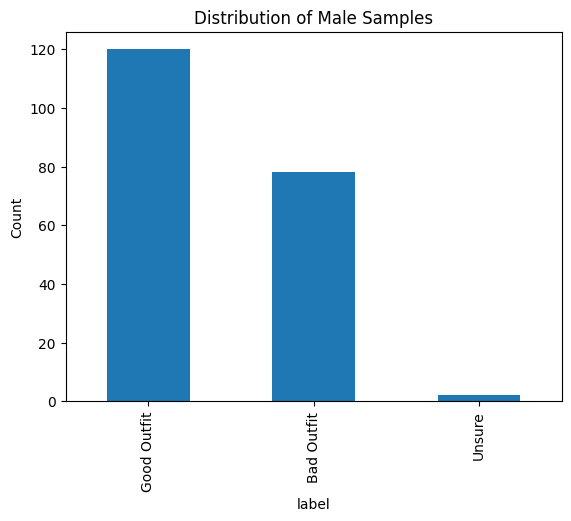

In [ ]:
# visualize histogram of labels titled Distribution of Evaluation Labels
plt.title("Distribution of Male Samples")
plt.xlabel("Label")
plt.ylabel("Count")
male_only_df["label"].value_counts().plot(kind="bar")

In [ ]:
male_only_df["label"].value_counts()

,count
label,
Good Outfit,120
Bad Outfit,78
Unsure,2


<Axes: title={'center': 'Distribution of Female Samples'}, xlabel='label', ylabel='Count'>

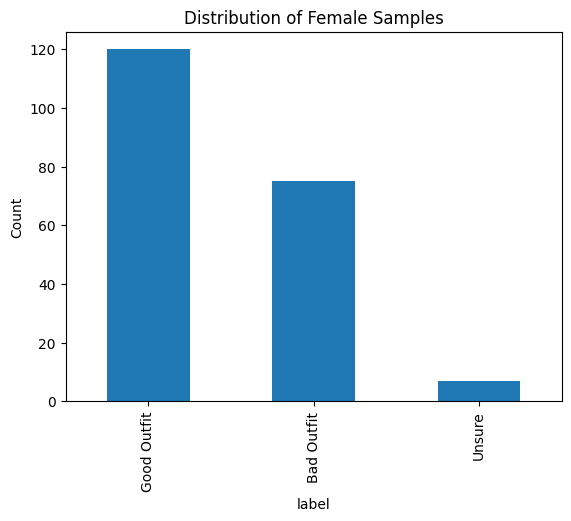

In [ ]:
# visualize histogram of labels titled Distribution of Evaluation Labels
plt.title("Distribution of Female Samples")
plt.xlabel("Label")
plt.ylabel("Count")
female_only_df["label"].value_counts().plot(kind="bar")

<Axes: title={'center': 'Distribution of Weather Sample'}, xlabel='label', ylabel='Count'>

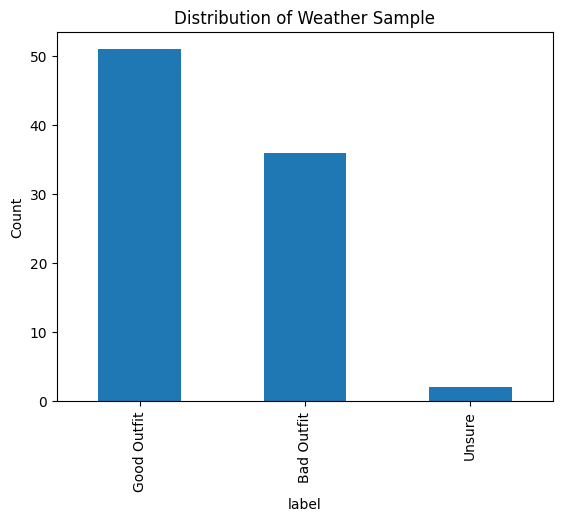

In [ ]:
# visualize histogram of labels titled Distribution of Evaluation Labels
weather_df = eval_df[eval_df["prompt"].isin(weather_prompts)]

plt.title("Distribution of Weather Sample")
plt.xlabel("Label")
plt.ylabel("Count")
weather_df["label"].value_counts().plot(kind="bar")

<Axes: title={'center': 'Distribution of Occasion Sample'}, xlabel='label', ylabel='Count'>

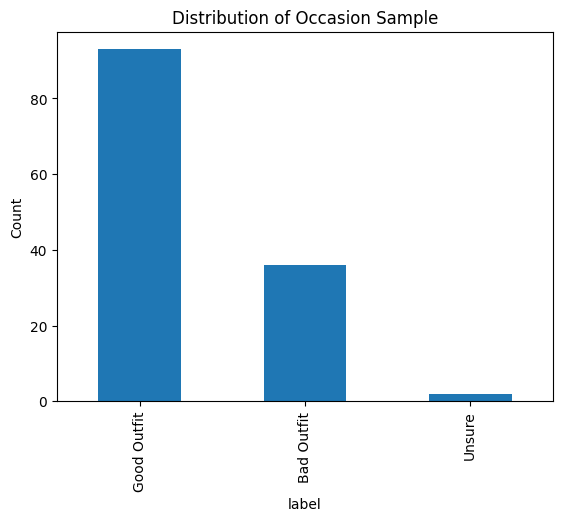

In [ ]:
# visualize histogram of labels titled Distribution of Evaluation Labels
occasion_df = eval_df[eval_df["prompt"].isin(occasion_prompts)]

plt.title("Distribution of Occasion Sample")
plt.xlabel("Label")
plt.ylabel("Count")
occasion_df["label"].value_counts().plot(kind="bar")

<Axes: title={'center': 'Distribution of Style Samples'}, xlabel='label', ylabel='Count'>

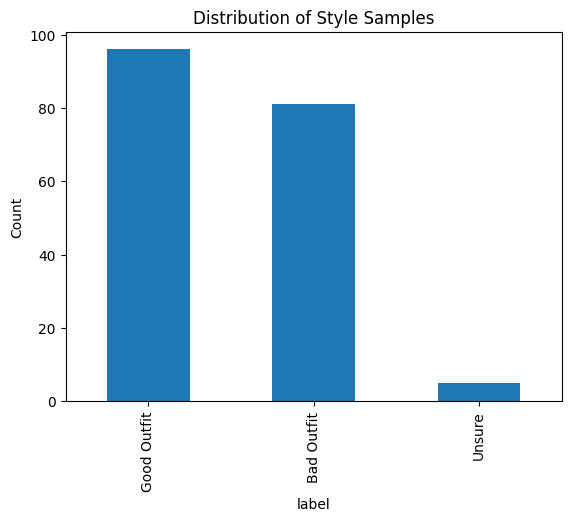

In [ ]:
# visualize histogram of labels titled Distribution of Evaluation Labels
style_df = eval_df[eval_df["prompt"].isin(style_prompts)]

plt.title("Distribution of Style Samples")
plt.xlabel("Label")
plt.ylabel("Count")
style_df["label"].value_counts().plot(kind="bar")

Thoughts:
* did a lot worse than I thought
* for gender, data on the gender of the labeler would be interesting to have
* including an explanantion section to explain the labeler's reasoning would have been interesting to have to
* suprisingly the woman's outfits did better than the men's
* for several of the men samples labelled bad outfit, I saw that the model recommended women's clothing items and I believe that had an impact on the labeler's judgment on the men outfit samples
* in practice the wardrobe would be specific to the user's gender, size, and fit instead of a big jumble of all kinds of clothes so this would be less of an issue, but we still wish our model would be able to handle this case better aka be able to pick out the suitable items out of a noiser list of items
* curious average time taken to label

In [ ]:
# create table showing the percentage of labels for each of the subgroups
# eval_df, male_df, female_df, occasion_df, weather_df, style_df
df_list = [eval_df, occasion_df, style_df, weather_df]
df_names = ["All Samples (N = 500)", "Occasion Based Prompts (N = 200)", "Style Based Prompts (N = 200)", "Weather Based Prompts (N = 100)"]
good_percents = []
bad_percents = []
unsure_percents = []

for df, name in zip(df_list, df_names):
    good_percents.append(np.round(df["label"].value_counts(normalize=True).reset_index()["proportion"][0],3))
    bad_percents.append(np.round(df["label"].value_counts(normalize=True).reset_index()["proportion"][1],3))
    unsure_percents.append(np.round(df["label"].value_counts(normalize=True).reset_index()["proportion"][2],3))


res = pd.DataFrame({"Prompt Set": df_names, "Good Outfits": good_percents, "Bad Outfit": bad_percents, "Unsure": unsure_percents})
res

,Prompt Set,Good Outfits,Bad Outfit,Unsure
0,All Samples (N = 500),0.597,0.381,0.022
1,Occasion Based Prompts (N = 200),0.710,0.275,0.015
2,Style Based Prompts (N = 200),0.527,0.445,0.027
3,Weather Based Prompts (N = 100),0.573,0.404,0.022
